<a href="https://colab.research.google.com/github/Vishal-Upendran/IUCAASummerSchool2021/blob/main/Python_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This section gives:

<br>

<font size=4>
    
1. Some basic intro to python, and OOP.
2. Data types - what is nan? 
3. Lists, dictionaries, dataframes.
4. Numpy.
5. Plotting - line, image. 
6. Different kinds of data.
7. Visualize data and show what it means.
    
</font>

# How variables work

In [ ]:
x = 5
print(x)
print(type(x))

x = "IUCAA"
print(x)
print(type(x))

In [ ]:
print(x)
print(type(x))

In [ ]:
x = ["Stars", "Galaxies", "Quasars"]
print(x)
print(type(x))

In [ ]:
# Add new element
x.append(42)

In [ ]:
x = {"Mass": 2e30, "Radius": 6.9e9, "Type": "G2V", "Surface Temperature": 5778}
print(x)
print(type(x))

In [ ]:
# Add new element
x["Luminosity"] = "1 solar luminos"

# Using functions

In [ ]:
x = 7
y = 9
z = x+y*(x-1)**3
print(z)

In [ ]:
def fun(v1,v2):
    return v1+v2*(v1-1)**3

In [ ]:
print(fun(x,y))

# Objects

In [ ]:
x = 2
help(x)

# All variables in python are objects.

<font size=4>

Every "variable" in python has some associated functions.
    
Possible to have custom data structure?
    
</font>

In [ ]:
class number:
    def __init__(self,value):
        self.value = value
    def __add__(self,value):
        return number(self.value+value.value)
    def __str__(self):
        return str(self.value)

In [ ]:
a = number(2)
b = number(3)

In [ ]:
c = a+b
print(c)

# Inheritance

In [ ]:
class Celestial:
    def __init__(self,ra,dec,distance):
        self.ra = ra
        self.dec = dec
        self.distance = distance
        
class Star(Celestial):
    def __init__(self,ra,dec,startype,distance):
        super(Star,self).__init__(ra,dec,distance)
        self.startype=startype
    def info(self):
        print(f"A Star of type {self.startype}")
        print(f"Plane of sky position:{self.ra} deg,{self.dec} deg")
        print(f"Distance from Earth: {self.distance} pc")

In [ ]:
sirius = Star(101.2833,-16.7161,"a1v",2.64)

In [ ]:
sirius.info()

# Numerical compute operations

<font size=4>
    
Scientific workflow needs array manipulation, and work with matrices. How is this done?

Use <span style ="color:#fb8500">packages</span>
    
Packages can be thought to be python files which have a bunch of functions. These functions can be called in our script and used on our variables, or "objects".
    
</font>

<font size=4>
    
Package list we will be using:

- $\color{#219ebc}{Numpy}$: Array manipulation, operations and our bread & butter.<br>
    
    
- $\color{#ffb703}{Matplotlib}$: Visualization - plotting graphs and making images.<br>
    

- $\color{#ef476f}{Astropy}$: FITS loading and manipulation.<br>    
    

- $\color{#76c893}{Pandas}$: Data loader, and basic data manipulation.<br>

-------------------------------

- $\color{#d08c60}{Scikit-learn}$: Machine learning package.<br>
    
    
- $\color{#dc2f02}{Pytorch}$: Deep learning package.<br>
    
</font>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 

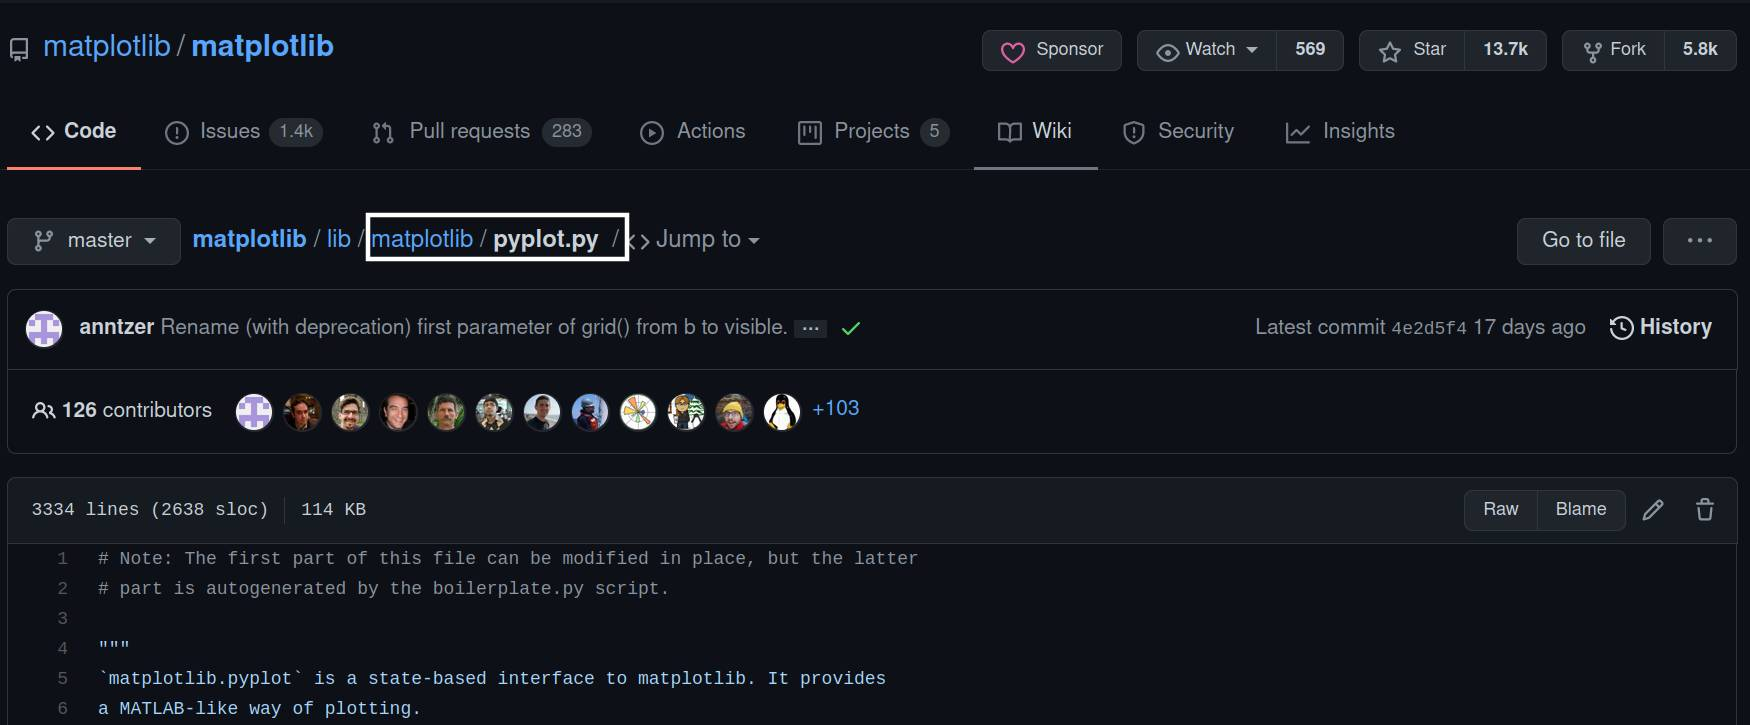

In [ ]:
x = np.linspace(-50,50,1000)
print(x)
print(type(x))

In [ ]:
gauss = np.exp(-x**2/100.0)
print(gauss)

In [ ]:
# plt.plot(x,gauss)
# plt.plot(x,gauss,color='red')
plt.plot(x,gauss,color='red',linestyle='--')
plt.xlabel("X-value")
plt.ylabel("f(x)")
plt.title("Gaussian function")

### Image visualization

<font size=4>

Let us define a 2-D Gaussian of the form: $$e^{-(x-5)^2/25-(y-5)^2/25}+e^{-(x+5)^2/25-(y+5)^2/25}$$    
    
</font>

In [ ]:
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
xx,yy = np.meshgrid(x,y)
doublegauss = np.exp(-(xx-5)**2/25.0-(yy-5)**2/25.0)+np.exp(-(xx+5)**2/25.0-(yy+5)**2/25.0)

In [ ]:
plt.imshow(doublegauss,cmap='RdYlBu_r',origin='lower')

In [ ]:
plt.figure(figsize=(10,8))
plt.contourf(x,y,doublegauss,100,cmap='RdYlBu_r')
plt.colorbar()

# Not a number

<br>
<font size = 4>

NaN is a special floating point value meant to reperesent anything that is "not a number" or "not data".
 
 
</font>

In [ ]:
n1 = float("nan")
n2 = float("Nan")
n3 = float("NaN")
n4 = float("NAN")
n5 = np.nan
print(n1, n2, n3, n4,n5)

In [ ]:
print(n1 == 0)
print(n1 == 100)
print(n2 < 0)

## Question:

<br>
<font size=4>
    
What is the expected output of n5==n5?


</font>

In [ ]:
print(n5 == n5)

# Can we visualize astro data?

<br>
<font size=4>

Astrophysics data is generally available in FITS format. Think of them as a file with multiple "shelves".
- Each data set - for example, one wavelength of observation - can be put in one shelf. 
- Each shelf has a "data" and a "header".
    - Header contains information on the satellite, location of object, Field of view, resolution, etc.
    - Data contains the actual counts.
    
We are going to use $\color{#ef476f}{Astropy}$ for this!
    
    
</font>

In [ ]:
from astropy.io import fits

Data available at: https://www.lmsal.com/hek/hcr?cmd=view-event&event-id=ivo%3A%2F%2Fsot.lmsal.com%2FVOEvent%23VOEvent_IRIS_20141022_081850_3860261381_2014-10-22T08%3A18%3A502014-10-22T08%3A18%3A50.xml

In [ ]:
!wget https://www.lmsal.com/solarsoft/irisa/data/level2_compressed/2014/10/22/20141022_081850_3860261381/iris_l2_20141022_081850_3860261381_SDO.tar.gz

In [ ]:
!tar -xvf iris_l2_20141022_081850_3860261381_SDO.tar.gz 

In [ ]:
aia = fits.open("aia_l2_20141022_081850_3860261381_171.fits")
print(aia.info())

In [ ]:
aia[0].header

In [ ]:
aiadata = aia[0].data
aiahead = aia[0].header

In [ ]:
print(aiadata.shape)

In [ ]:
from astropy.wcs import WCS

In [ ]:
wcs  = WCS(aiahead)
print(wcs)

In [ ]:
#Plot at first time step.
ind = 50
plt.figure(figsize=(8,8))
plt.subplot(projection = wcs.dropaxis(-1))
plt.imshow(np.log10(aiadata[ind]),cmap='Blues_r')

In [ ]:
aia1 = fits.open("aia_l2_20141022_081850_3860261381_171.fits")
aiadata1 = aia1[0].data
wcs1  = WCS(aia1[0].header)

aia2 = fits.open("aia_l2_20141022_081850_3860261381_1700.fits")
aiadata2 = aia2[0].data
wcs2  = WCS(aia2[0].header)

index = -50

tmp_aiadata1 = np.log10(aiadata1[index])
tmp_aiadata2 = np.log10(aiadata2[index])

plt.figure(figsize=(10,10))
plt.imshow(tmp_aiadata2,origin='lower',cmap='Reds_r',alpha=1.0)
plt.imshow(tmp_aiadata1,origin='lower',cmap='Blues_r',alpha=0.7)

In [ ]:
def nanptp(x):
    return np.nanmax(x)-np.nanmin(x)

In [ ]:
index = -10

aia1 = fits.open("aia_l2_20141022_081850_3860261381_171.fits") # Red
aiadata1 = np.log10(aia1[0].data[index])
aiadata1 = 255*(aiadata1-np.nanmin(aiadata1))/nanptp(aiadata1)

aia2 = fits.open("aia_l2_20141022_081850_3860261381_193.fits") # Green
aiadata2 = np.log10(aia2[0].data[index])
aiadata2 = 255*(aiadata2-np.nanmin(aiadata2))/nanptp(aiadata2)

aia3 = fits.open("aia_l2_20141022_081850_3860261381_131.fits") # Blue
aiadata3 = np.log10(aia3[0].data[index])
aiadata3 = 255*(aiadata3-np.nanmin(aiadata3))/nanptp(aiadata3)

tmp_aiadata = np.asarray([aiadata1,aiadata2,aiadata3]).transpose(1,2,0).astype(int)

plt.figure(figsize=(10,10))
plt.imshow(tmp_aiadata,origin='lower', interpolation='nearest')

# Exercise: Fourier transform

<br>
<font size=4>
    
Fourier transform breaks down a signal into sinusoids of various frequencies. This may be done in 1D or 2D or 3D. We now see a cute example of the effect of FFT on an image


</font>

In [ ]:
aia1 = fits.open("aia_l2_20141022_081850_3860261381_171.fits")
aiadata1 = aia1[0].data
wcs1  = WCS(aia1[0].header)

In [ ]:
index = -50

tmp_aiadata1 = np.log10(aiadata1[index])

plt.figure(figsize=(6,6))
plt.imshow(tmp_aiadata1,origin='lower',cmap='hot')

In [ ]:
tmp_aiadata1_fft = np.fft.fft2(tmp_aiadata1)
tmp_aiadata1_fft_amp,tmp_aiadata1_fft_phase = np.abs(tmp_aiadata1_fft),np.angle(tmp_aiadata1_fft)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(np.log10(tmp_aiadata1_fft_amp),origin='lower',cmap='hot')
plt.title("Amplitude")
plt.subplot(1,2,2)
plt.imshow(tmp_aiadata1_fft_phase,origin='lower',cmap='hot')
plt.title("Phase")

In [ ]:
tmp_aiadata1_fft = np.fft.fft2(tmp_aiadata1)
tmp_aiadata1_fft_amp,tmp_aiadata1_fft_phase = np.abs(tmp_aiadata1_fft),np.angle(tmp_aiadata1_fft)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(np.fft.fftshift(np.log10(tmp_aiadata1_fft_amp)),origin='lower',cmap='hot')
plt.title("Amplitude")
plt.subplot(1,2,2)
plt.imshow(np.fft.fftshift(tmp_aiadata1_fft_phase),origin='lower',cmap='hot')
plt.title("Phase")

In [ ]:
tmp_aiadata1_ifft = np.abs(np.fft.ifft2(tmp_aiadata1_fft_amp*np.exp(1j*tmp_aiadata1_fft_phase)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(tmp_aiadata1_ifft,origin='lower',cmap='hot')
plt.title("Inverse FT")
plt.subplot(1,2,2)
plt.imshow(tmp_aiadata1,origin='lower',cmap='hot')
plt.title("Original")

## Filtering: High and Low pass filters

In [ ]:
xx,yy = np.meshgrid(np.linspace(-5,5,tmp_aiadata2.shape[0]),np.linspace(-5,5,tmp_aiadata2.shape[1]))
highpassfilter = 1-np.exp(-15*(xx)**2-16*(yy)**2).T

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(highpassfilter,origin='lower',cmap='gray')
plt.title("High pass filter, Fourier space")
plt.subplot(1,2,2)
plt.imshow(np.log10(np.fft.fftshift(tmp_aiadata1_fft_amp)),origin='lower',cmap='hot')
plt.title("AIA data: Fourier amplitude")

## Question: What does high pass filter give us?

In [ ]:
highpassfilter = np.fft.fftshift(highpassfilter)
tmp_aiadata1_ifft = np.abs(np.fft.ifft2(highpassfilter*tmp_aiadata1_fft_amp*np.exp(1j*tmp_aiadata1_fft_phase)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(tmp_aiadata1_ifft,origin='lower',cmap='hot')
plt.title("Inverse FT high pass filter")
plt.subplot(1,2,2)
plt.imshow(tmp_aiadata1,origin='lower',cmap='hot')
plt.title("Original")

In [ ]:
xx,yy = np.meshgrid(np.linspace(-5,5,tmp_aiadata1.shape[0]),np.linspace(-5,5,tmp_aiadata1.shape[1]))
lowpassfilter = np.exp(-16*(xx)**2-16*(yy)**2).T

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(lowpassfilter,origin='lower',cmap='gray')
plt.title("Low pass filter: Fourier space")
plt.subplot(1,2,2)
plt.imshow(np.log10(np.fft.fftshift(tmp_aiadata1_fft_amp)),origin='lower',cmap='hot')
plt.title("AIA amplitude: Fourier space")

In [ ]:
lowpassfilter = np.fft.fftshift(lowpassfilter)
tmp_aiadata1_ifft = np.abs(np.fft.ifft2(lowpassfilter*tmp_aiadata1_fft_amp*np.exp(1j*tmp_aiadata1_fft_phase)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(tmp_aiadata1_ifft,origin='lower',cmap='hot')
plt.title("Inverse FT low pass filter")
plt.subplot(1,2,2)
plt.imshow(tmp_aiadata1,origin='lower',cmap='hot')
plt.title("Original")

# Visualizing data frames

<br>
<font size=4>

Not all astro data comes in fits format. Sometimes, tabulated data is saved as `csv' or **Comma Separated Values**. Think of these as Excel sheets with the column names as some variable, and rows representing different observations of these variables.
    
**$\color{#76c893}{Pandas}$** is the go-to library for working with such data. Let's see how this works out.
    
    
</font>

First, I have some data downloaded already. Let's get it from Google drive.

In [ ]:
!gdown --id 1D7OZ_ibIjl-2clagDXHBgiX_-BxAycmK

In [ ]:
import pandas as pd

In [ ]:
Data = pd.read_csv("Skyserver_12_15_2020 3 45 07 AM.csv",comment="#")

In [ ]:
Data.head()

In [ ]:
Data['ra'].values.shape

In [ ]:
Data.columns

In [ ]:
Data.hist(column = ["u","g","r","i","z"],figsize=(12,12),bins=30)

Why is magnitude negative? Let's check

In [ ]:
Data['i'].min()

<br>
<font size=4>

-9999.0 or any such number represents missing data. Hence, we have two options:
1. Drop rows where the value is this filler value.
2. Interpolate across these values.

</font>

## Question: When do we interpolate?
<br>

<font size=4>
    I don't like interpolation, so I will drop the rows.
</font>

In [ ]:
#First, replace with nan
Data = Data.replace(-9999.0,np.nan)
Data.dropna(inplace=True)

In [ ]:
Data['i'].min()

In [ ]:
Data.hist(column = ["u","g","r","i","z"],figsize=(12,12),bins=30)

# Exercise

<br>
<font size=4>
Make a video with as many frames of this data as you like (there are 2500 or so frames), and as many passbands as you like, and submit. You may use any wavelength and any colormap you like. You will need to add the frame number on the title and keep updating it in the video. As a hint, use the `celluloid' library for making the vide.
</font>

In [ ]:
from celluloid import Camera

In [ ]:
# Write code to load data, take frame and then make video.
# Check the example code here and adapt it: https://github.com/jwkvam/celluloid.
fig = plt.figure(figsize=(8,8))
camera = Camera(fig)
for ind in np.arange(10):
    val = np.log10(aiadata[ind])
    plt.imshow(val,cmap='Blues_r',clim=(np.nanpercentile(np.log10(aiadata),5),np.nanpercentile(np.log10(aiadata),99)),origin='lower')
    camera.snap()    


In [ ]:
from IPython.display import HTML
animation = camera.animate()
HTML(animation.to_html5_video())